In [13]:
import arviz as az
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(26)

xdata = np.linspace(0, 50, 100)
b0, b1, sigma = -2, 1, 3
ydata = np.random.normal(loc=b1 * xdata + b0, scale=sigma)

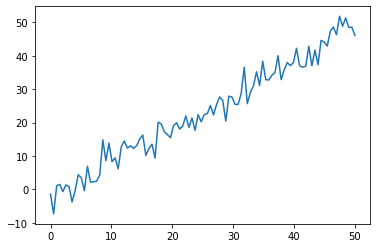

In [15]:
plt.plot(xdata, ydata);

In [16]:
def compile_linreg_model(xdata, ydata):
    with pm.Model() as model:
        x = pm.Data('xdata', xdata)
        y_obs = pm.Data('ydata', ydata)
        b0 = pm.Normal("b0", 0, 10)
        b1 = pm.Normal("b1", 0, 10)
        sigma_e = pm.HalfNormal("sigma_e", 10)

        y = pm.Normal("y", b0 + b1 * x, sigma_e, observed=y_obs)
    return model

def sel_observations(xdata, ydata, idx):
        mask = np.isin(np.arange(len(xdata)), idx)
        data_dict = {"xdata": xdata, "ydata": ydata}
        data__i = {key: value[~mask] for key, value in data_dict.items()}
        data_ex = {key: value[mask] for key, value in data_dict.items()}
        return data__i, data_ex

# with pm.Model() as model:
#     x = pm.Data('xdata', xdata)
#     y_obs = pm.Data('ydata', ydata)
#     b0 = pm.Normal("b0", 0, 10)
#     b1 = pm.Normal("b1", 0, 10)
#     sigma_e = pm.HalfNormal("sigma_e", 10)

#     y = pm.Normal("y", b0 + b1 * x, sigma_e, observed=y_obs)

In [18]:
mod_data, ex_data = sel_observations(xdata, ydata, 13)

sample_kwargs = {"draws": 1000, "tune": 1000, "chains": 4, "progressbar": False}
with compile_linreg_model(**mod_data) as linreg_model:
    trace = pm.sample(**sample_kwargs)

with linreg_model:
    print(linreg_model['xdata'].get_value())
    pm.set_data({"xdata": ex_data["xdata"], "ydata": ex_data["ydata"]})
    print(linreg_model['xdata'].get_value())

log_lik__i = az.from_pymc3(trace, model=linreg_model, log_likelihood=True).log_likelihood['y']


/tmp/ipykernel_25166/959293144.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sample_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_e, b1, b0]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.9070915382094323, but should be close to 0.8. Try to increase the number of tuning steps.


[ 0.          0.50505051  1.01010101  1.51515152  2.02020202  2.52525253
  3.03030303  3.53535354  4.04040404  4.54545455  5.05050505  5.55555556
  6.06060606  7.07070707  7.57575758  8.08080808  8.58585859  9.09090909
  9.5959596  10.1010101  10.60606061 11.11111111 11.61616162 12.12121212
 12.62626263 13.13131313 13.63636364 14.14141414 14.64646465 15.15151515
 15.65656566 16.16161616 16.66666667 17.17171717 17.67676768 18.18181818
 18.68686869 19.19191919 19.6969697  20.2020202  20.70707071 21.21212121
 21.71717172 22.22222222 22.72727273 23.23232323 23.73737374 24.24242424
 24.74747475 25.25252525 25.75757576 26.26262626 26.76767677 27.27272727
 27.77777778 28.28282828 28.78787879 29.29292929 29.7979798  30.3030303
 30.80808081 31.31313131 31.81818182 32.32323232 32.82828283 33.33333333
 33.83838384 34.34343434 34.84848485 35.35353535 35.85858586 36.36363636
 36.86868687 37.37373737 37.87878788 38.38383838 38.88888889 39.39393939
 39.8989899  40.4040404  40.90909091 41.41414141 41.

In [ ]:

# with compile_linreg_model(**mod_data) as linreg_model:
#     trace = pm.sample(**sample_kwargs)


# with model:
#     trace = pm.sample(**sample_kwargs)

# print(mod_data.keys())
# with compile_linreg_model(mod_data['xdata'], mod_data['ydata']) as linreg_model:
#     print(linreg_model['xdata'])
#     pm.set_data(
#             {
#                 'xdata': mod_data['xdata'],
#                 'ydata': mod_data['ydata']
#             }
#     )

# with linreg_model:
#     trace = pm.sample(
#             **sample_kwargs, 
#             return_inferencedata=False, 
#             idata_kwargs={"log_likelihood": False}
#         )

# mod_data, ex_data = sel_observations(xdata, ydata, 20)
# with linreg_model:
#     pm.set_data(
#             mod_data
#     )
#     trace = pm.sample(
#         **sample_kwargs, 
#         return_inferencedata=False, 
#         idata_kwargs={"log_likelihood": False}
    # )

In [6]:


mod_data, ex_data = sel_observations(xdata, ydata, 0)

with pm.Model() as model:
    x = pm.Data('xdata', mod_data['xdata'])
    y_obs = pm.Data('ydata', mod_data['ydata'])
    b0 = pm.Normal("b0", 0, 10)
    b1 = pm.Normal("b1", 0, 10)
    sigma_e = pm.HalfNormal("sigma_e", 10)

    y = pm.Normal("y", b0 + b1 * x, sigma_e, observed=y_obs)

mod_data, ex_data = sel_observations(xdata, ydata, 13)

with model:
        pm.set_data(
                mod_data
        )
        trace = pm.sample(
                **sample_kwargs, 
                return_inferencedata=False, 
                idata_kwargs={"log_likelihood": False}
            )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_e, b1, b0]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.9070915382094323, but should be close to 0.8. Try to increase the number of tuning steps.


In [7]:
dims = {"y": ["time"]}
idata_kwargs = {
    "dims": dims,
}
idata = az.from_pymc3(trace, model=linreg_model, **idata_kwargs)

In [8]:
class PyMC3LinRegWrapper(az.SamplingWrapper):
    def __init__(self, xdata, ydata, model, **kwargs):
        print(kwargs)


        self.xdata = xdata
        self.ydata = ydata

        __selected_data, _ = self.sel_observations(0)
        self.pymc3_model = model(**__selected_data)
        
        super(PyMC3LinRegWrapper, self).__init__(model=model, **kwargs)

    def sample(self, modified_observed_data):
        with self.pymc3_model:
            pm.set_data(
                modified_observed_data
            )
            trace = pm.sample(
                **self.sample_kwargs, 
                return_inferencedata=False, 
                idata_kwargs={"log_likelihood": False}
            )
        # with self.model(**modified_observed_data) as linreg_model:
        #     trace = pm.sample(
        #         **self.sample_kwargs, 
        #         return_inferencedata=False, 
        #         idata_kwargs={"log_likelihood": False}
        #     )
        # self.pymc3_model = linreg_model
        return trace
    
    def get_inference_data(self, trace):
        idata = az.from_pymc3(trace, model=self.pymc3_model, **self.idata_kwargs)
        idata.pymc3_trace = trace
        return idata
        
    def log_likelihood__i(self, excluded_observed_data, idata__i):
        with self.pymc3_model:
            pm.set_data(excluded_observed_data)
        
        # model_ex = compile_linreg_model(**excluded_observed_data)
        log_lik__i = az.from_pymc3(idata__i.pymc3_trace, model=self.pymc3_model, log_likelihood=True).log_likelihood["y"]
        print(log_lik__i)
        return log_lik__i
        
    def sel_observations(self, idx):
        mask = np.isin(np.arange(len(self.xdata)), idx)
        data_dict = {"xdata": self.xdata, "ydata": self.ydata}
        data__i = {key: value[~mask] for key, value in data_dict.items()}
        data_ex = {key: value[mask] for key, value in data_dict.items()}
        return data__i, data_ex

In [9]:
loo_orig = az.loo(idata, pointwise=True)
loo_orig

Computed from 4000 by 100 log-likelihood matrix

         Estimate       SE
elpd_loo  -250.94     7.19
p_loo        3.13        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      100  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [10]:
loo_orig.pareto_k[[13, 42, 56, 73]] = np.array([0.8, 1.2, 2.6, 0.9])

In [11]:
pymc3_wrapper = PyMC3LinRegWrapper(
    model=compile_linreg_model, xdata=xdata, ydata=ydata, sample_kwargs=sample_kwargs, idata_kwargs=idata_kwargs
)

{'sample_kwargs': {'draws': 1000, 'tune': 1000, 'chains': 4, 'progressbar': False}, 'idata_kwargs': {'dims': {'y': ['time']}}}


In [12]:
loo_relooed = az.reloo(pymc3_wrapper, loo_orig=loo_orig)

/home/mathieu/anaconda3/envs/phd/lib/python3.9/site-packages/arviz/stats/stats_refitting.py:99: UserWarning: reloo is an experimental and untested feature
  warnings.warn("reloo is an experimental and untested feature", UserWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_e, b1, b0]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.688282976923873, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


<xarray.DataArray 'y' (chain: 4, draw: 1000, y_dim_0: 1)>
array([[[-2.10543541],
        [-2.26268044],
        [-2.24398002],
        ...,
        [-2.38602558],
        [-2.43204803],
        [-2.34112534]],

       [[-2.14961077],
        [-2.11235738],
        [-2.42262207],
        ...,
        [-2.42480517],
        [-2.25903187],
        [-2.14216682]],

       [[-2.40485718],
        [-2.33768043],
        [-2.35306812],
        ...,
        [-2.21554592],
        [-2.48245259],
        [-2.48838485]],

       [[-2.12745585],
        [-2.12745585],
        [-2.24609928],
        ...,
        [-2.312818  ],
        [-2.12802388],
        [-2.2406492 ]]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * y_dim_0  (y_dim_0) int64 0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_e, b1, b0]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


<xarray.DataArray 'y' (chain: 4, draw: 1000, y_dim_0: 1)>
array([[[-2.17804709],
        [-2.32469977],
        [-2.22491657],
        ...,
        [-2.12911097],
        [-2.22127195],
        [-2.12540108]],

       [[-2.17297386],
        [-1.96720777],
        [-1.96252246],
        ...,
        [-1.95191749],
        [-2.13783678],
        [-2.06057511]],

       [[-2.11315763],
        [-2.13860498],
        [-2.03996056],
        ...,
        [-2.07581814],
        [-2.11082991],
        [-2.11436546]],

       [[-2.1813535 ],
        [-2.11473245],
        [-2.05467636],
        ...,
        [-2.09811192],
        [-1.99740735],
        [-2.05422313]]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * y_dim_0  (y_dim_0) int64 0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_e, b1, b0]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.881560914289616, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


<xarray.DataArray 'y' (chain: 4, draw: 1000, y_dim_0: 1)>
array([[[-2.03123661],
        [-1.96230852],
        [-2.00323877],
        ...,
        [-1.86801223],
        [-1.95140003],
        [-1.96386102]],

       [[-1.92745091],
        [-1.96297222],
        [-1.94588973],
        ...,
        [-2.02047721],
        [-2.00392548],
        [-2.02243067]],

       [[-2.01440247],
        [-2.049158  ],
        [-2.09014364],
        ...,
        [-2.08835659],
        [-1.95187615],
        [-2.06310856]],

       [[-2.04416286],
        [-2.00095026],
        [-2.02493988],
        ...,
        [-1.9700842 ],
        [-1.94880506],
        [-2.02516868]]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * y_dim_0  (y_dim_0) int64 0


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_e, b1, b0]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.8935480719222901, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7143826987066215, but should be close to 0.8. Try to increase the number of tuning steps.


<xarray.DataArray 'y' (chain: 4, draw: 1000, y_dim_0: 1)>
array([[[-1.97050984],
        [-1.93097735],
        [-1.96745968],
        ...,
        [-2.11809748],
        [-2.12836608],
        [-2.07525711]],

       [[-2.05575459],
        [-1.881653  ],
        [-2.07324228],
        ...,
        [-1.94075831],
        [-2.03549591],
        [-2.07475786]],

       [[-2.002954  ],
        [-1.99005157],
        [-1.87286045],
        ...,
        [-1.90871197],
        [-2.13048183],
        [-2.15437592]],

       [[-1.98040736],
        [-2.05406526],
        [-1.9592815 ],
        ...,
        [-2.10165719],
        [-1.9103922 ],
        [-2.00868241]]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * y_dim_0  (y_dim_0) int64 0


In [182]:
loo_relooed

Computed from 4000 by 100 log-likelihood matrix

         Estimate       SE
elpd_loo  -251.07     7.17
p_loo        3.22        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      100  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [183]:
loo_orig

Computed from 4000 by 100 log-likelihood matrix

         Estimate       SE
elpd_loo  -251.08     7.17
p_loo        3.23        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       96   96.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         2    2.0%
   (1, Inf)   (very bad)    2    2.0%